In [1]:
import pandas as pd
import sqlite3

In [4]:
connection = sqlite3.connect('./data/sql-murder-mystery.db')
cursor = connection.cursor()

In [5]:
def sql_query(query):
    return pd.read_sql(query, connection)

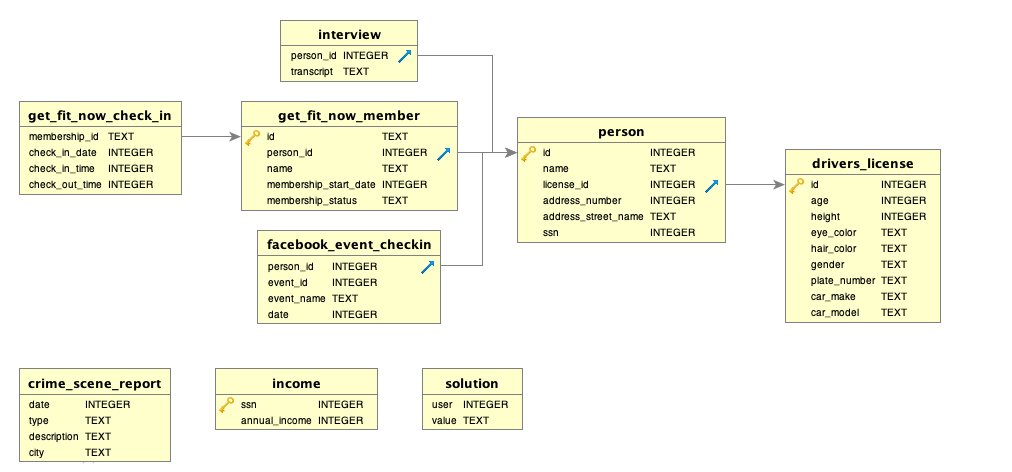

Ha ocurrido un crimen y el detective necesita tu ayuda. El detective te dio el informe de la escena del crimen, pero por alguna razón lo perdiste. Recuerdas vagamente que se trató de un **asesinato** ocurrido el **15 de enero de 2018** en **SQL City**. Empieza por recuperar el informe correspondiente de la base de datos del departamento de policía.

In [25]:
query = '''
SELECT description
FROM crime_scene_report
WHERE city LIKE '%SQL%' and date LIKE '20180115' and type LIKE 'murder'
'''

r1 = sql_query(query)

In [26]:
pd.set_option('display.max_colwidth', None)

r1


,description
0,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave""."


Las imágenes de seguridad muestran que había dos testigos. El primero vive en la última casa de Northwestern Dr. El segundo, llamado Annabel, vive en algún lugar de Franklin Ave.

In [62]:
#Testigo numero 1

In [30]:
query = '''
SELECT *
FROM person
WHERE name LIKE '%Annabel%' and address_street_name LIKE '%Franklin Ave%'
'''
sql_query(query)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [65]:
query = '''
SELECT *
FROM person
WHERE address_street_name LIKE '%Northwestern%'
ORDER BY address_number DESC
'''
a = sql_query(query)

In [61]:
#Testigo numero 2

In [66]:
a.head(1)

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [60]:
query = '''
SELECT a.*, b.id, b.name
FROM interview as a
LEFT JOIN person as b
ON a.person_id = b.id
WHERE b.name LIKE '%Morty Schapiro%' OR b.name LIKE '%Annabel Miller%'
'''

sql_query(query)

,person_id,transcript,id,name
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W"".",14887,Morty Schapiro
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th.",16371,Annabel Miller


In [67]:
# Declaraciones de los dos testigos

+ Morty Schapiro : Oí un disparo y luego vi a un hombre salir corriendo. Llevaba una bolsa de *gimnasio* "Get Fit Now". El número de socio empezaba por **48Z**. Solo los socios **Gold** tienen esas bolsas. El hombre se subió a un coche con matrícula **H42W**.
+ Annabel Miller : Vi ocurrir el asesinato y reconocí al asesino en *mi gimnasio* cuando estaba entrenando la semana pasada, el **9 de enero**.

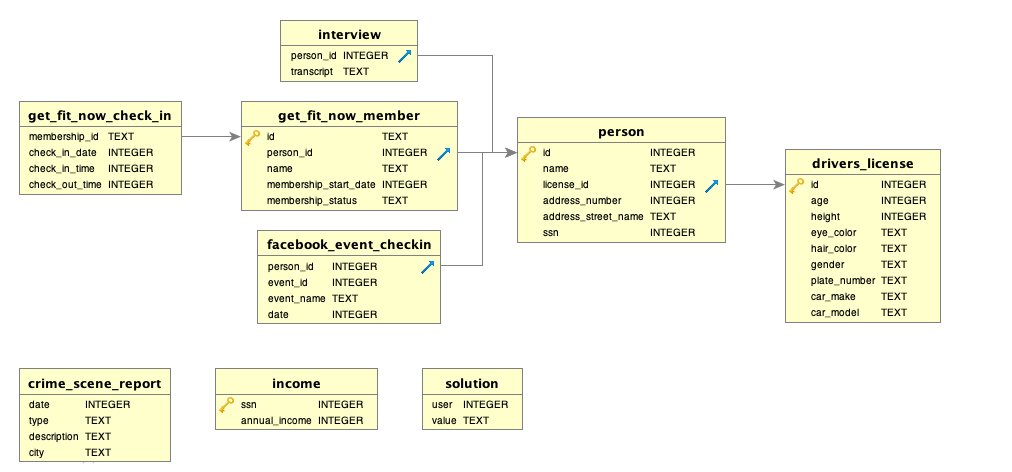

In [70]:
query = '''
SELECT *
FROM get_fit_now_member
WHERE membership_status LIKE '%gold%' and id LIKE '48Z%'
'''
sql_query(query)

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


In [72]:
# 15 de enero de 2018 (fecha crimen)
# 9 de enero (cuando lo vio entrenando)

In [74]:
query = '''
SELECT a.*, b.*
FROM get_fit_now_member AS a
INNER JOIN get_fit_now_check_in AS b
ON a.id = b.membership_id
WHERE check_in_date LIKE '20180109' and id LIKE '48Z%'
'''
sql_query(query)

,id,person_id,name,membership_start_date,membership_status,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,28819,Joe Germuska,20160305,gold,48Z7A,20180109,1600,1730
1,48Z55,67318,Jeremy Bowers,20160101,gold,48Z55,20180109,1530,1700


In [75]:
#Siguen siendo los dos de antes

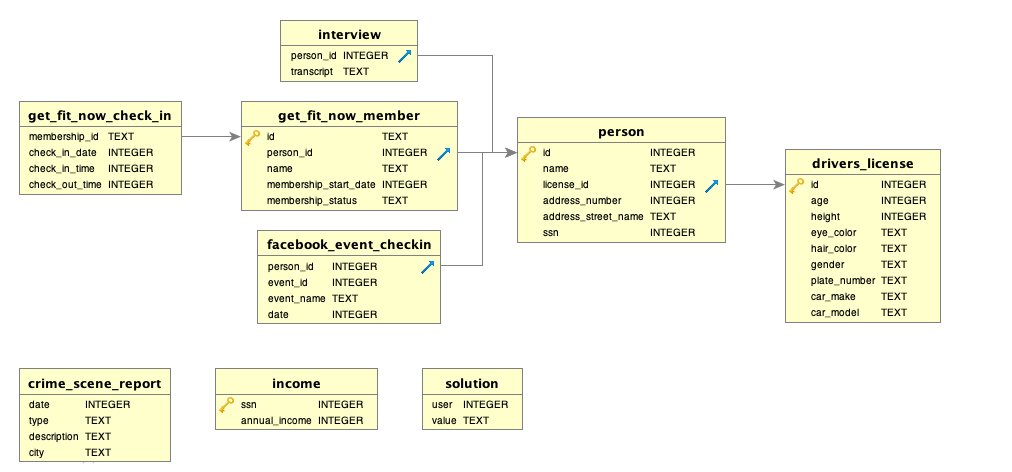

In [88]:
query = '''
SELECT a.id, a.name, b.plate_number
FROM person AS a
LEFT JOIN drivers_license AS b
ON a.license_id = b.id
WHERE plate_number LIKE '%H42W%' and name LIKE 'Joe Germuska' OR name LIKE 'Jeremy Bowers'
'''
sql_query(query)

,id,name,plate_number
0,67318,Jeremy Bowers,0H42W2


# Resultado 1
El asesino se llama **Jeremy Bowers**

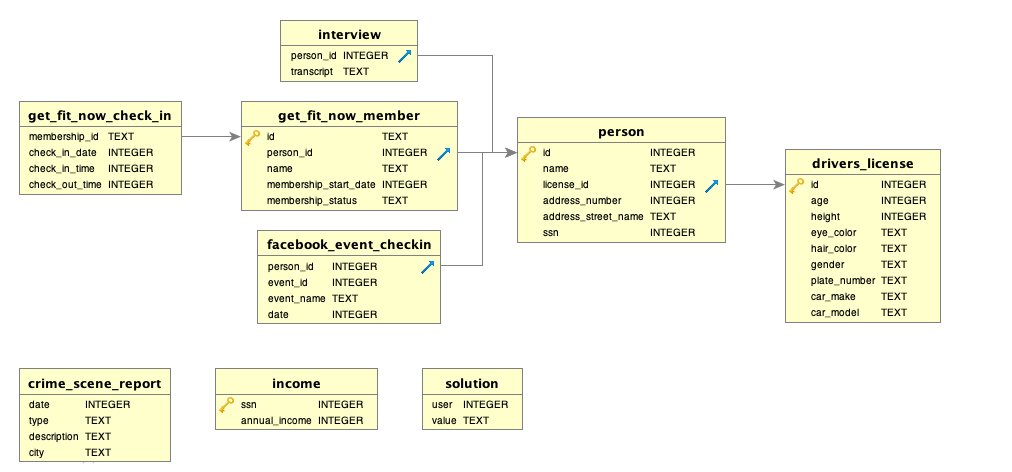

In [89]:
query = '''
SELECT *
FROM interview
WHERE person_id LIKE '67318'
'''
sql_query(query)

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


Me contrató una **mujer** con mucho dinero. No sé su nombre, pero sé que mide entre **1,65 y 1,70 m**. Es **pelirroja** y conduce un **Tesla Model S**. Sé que asistió al **concierto** sinfónico de SQL **tres veces** en **diciembre de 2017**.

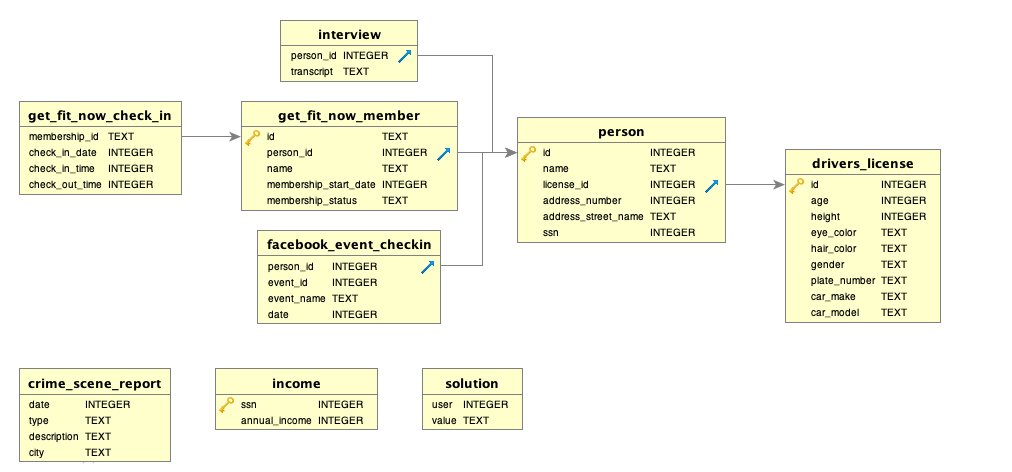

In [101]:
# 64 y 67 son 165 y 170 en pulgadas

In [117]:
query = '''
SELECT a.*, b.*
FROM person AS a
LEFT JOIN drivers_license AS b
ON a.license_id = b.id
WHERE height > 64 and height < 67 and gender LIKE 'female' and hair_color LIKE 'red' and car_make LIKE 'Tesla' and car_model LIKE 'Model S'
'''
sql_query(query)

,id,name,license_id,address_number,address_street_name,ssn,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,78881,Red Korb,918773,107,Camerata Dr,961388910,918773,48,65,black,red,female,917UU3,Tesla,Model S
1,90700,Regina George,291182,332,Maple Ave,337169072,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388,202298,68,66,green,red,female,500123,Tesla,Model S


In [124]:
query = '''
SELECT *
FROM facebook_event_checkin
WHERE date LIKE '201712%' and person_id LIKE '78881' OR person_id LIKE '90700' OR person_id LIKE '99716'
'''
a = sql_query(query)

In [125]:
a

,person_id,event_id,event_name,date
0,99716,1143,SQL Symphony Concert,20171206
1,99716,1143,SQL Symphony Concert,20171212
2,99716,1143,SQL Symphony Concert,20171229


In [135]:
a.person_id.unique()

array([99716])

# Resultado 2
El cerebro del asesinato se llama **Miranda Priestly**

In [136]:
#Por comprobar si tiene declaración
query = '''
SELECT *
FROM interview
WHERE person_id LIKE '99716'
'''
sql_query(query)

,person_id,transcript
